In [1]:
!pip install opencv-python
!pip install matplotlib 
!pip install numpy 

In [2]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import glob 
plt.ion()

In [352]:
def get_green_mask_naive(img):
    
    #get img size
    h, w, _ = img.shape
    overall_pixels_1d = h * w 
    
    img = cv2.blur(img, (9,9))
    
    # Change color space from bgr to hsv
    hsv_frame = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    low_green = np.array([15, 35, 0])
    high_green = np.array([140, 255, 150])
    green_mask = cv2.inRange(hsv_frame, low_green, high_green)

#     low_brown = np.array([10, 100, 20])
#     high_brown = np.array([20, 255, 200])
#     brown_mask = cv2.inRange(hsv_frame, low_brown, high_brown)

#     mask = np.bitwise_or(green_mask, brown_mask)
    mask = green_mask
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3))
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
    mask = cv2.dilate(mask, kernel, 3)

    
    after_img = cv2.bitwise_and(img, img, mask=mask)
    
    img_tree_1d = (mask == 255)
    
    print(np.sum(img_tree_1d) / overall_pixels_1d)
    
    return after_img
    
    

0.4548693094135802
images/TSNQ2014 1395_N48_79_S32_98.jpg


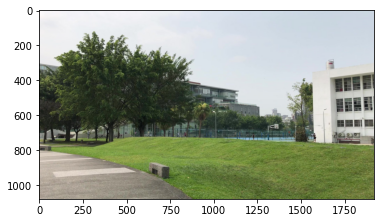

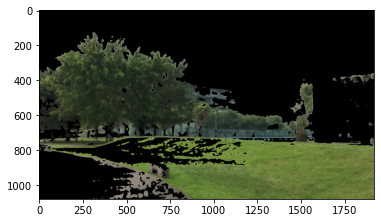

0.469600212191358
images/TSNQ2014 0933_N57_76_S13_97.jpg


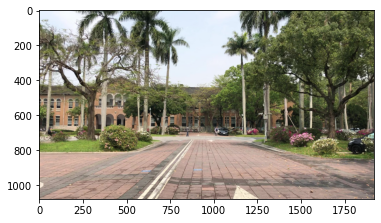

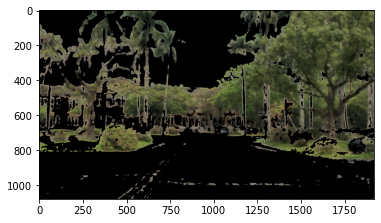

0.5222733410493827
images/TSNQ2014 1010_N61_80_S10_93.jpg


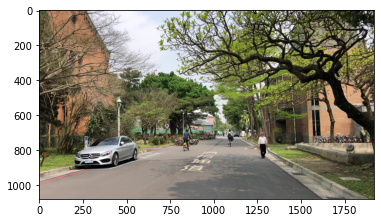

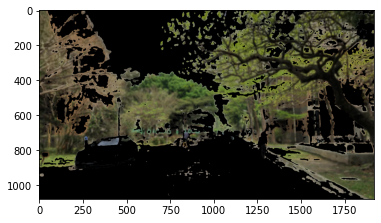

0.46476466049382714
images/TSNQ2014 0776_N40_16_S14_24.jpg


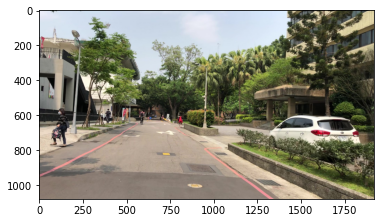

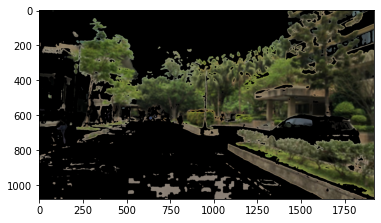

0.38652681327160493
images/TSNQ2014 0676_N24_94_S11_78.jpg


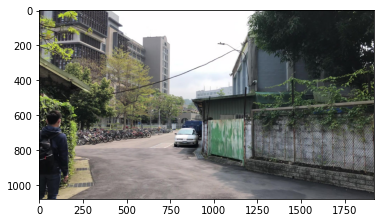

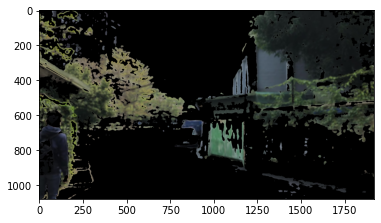

0.43496431327160495
images/TSNQ2014 0960_N59_91_S11_39.jpg


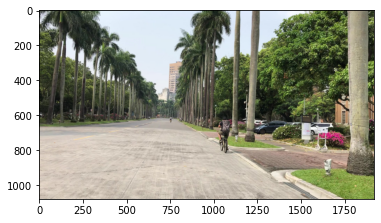

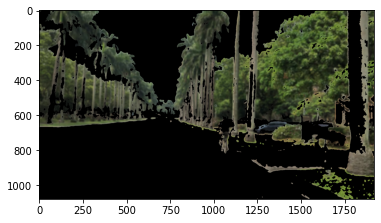

0.17917824074074074
images/TSNQ2014 0267_N20_80_S08_50.jpg


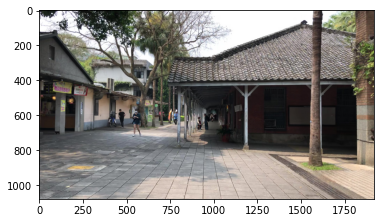

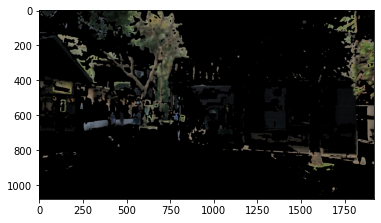

0.47130063657407406
images/TSNQ2014 0053_N37_52_S12_17.jpg


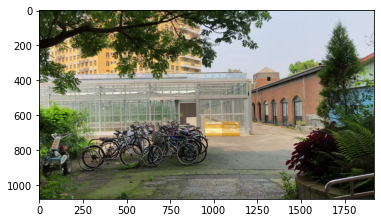

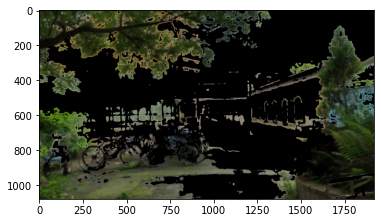

0.5395384837962963
images/TSNQ2014 1948_N58_52_S02_21.jpg


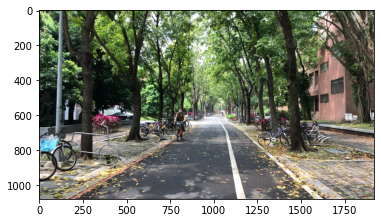

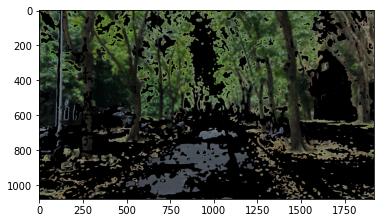

0.5147376543209876
images/TSNQ2014 1177_N71_07_S05_27.jpg


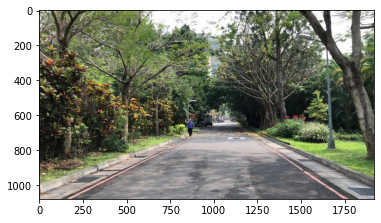

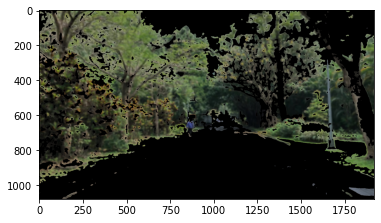

0.43829957561728394
images/TSNQ2014 1206_N44_37_S03_20.jpg


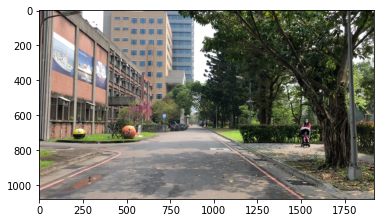

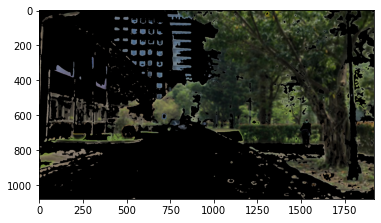

0.5793306327160493
images/TSNQ2014 1568_N78_24_S02_29.jpg


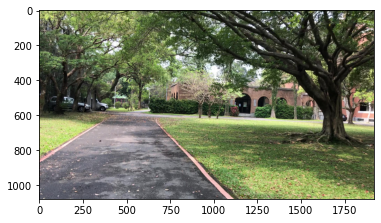

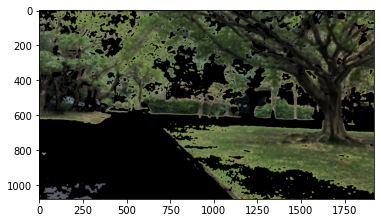

0.6167288773148148
images/TSNQ2014 0567_N65_96_S01_69.jpg


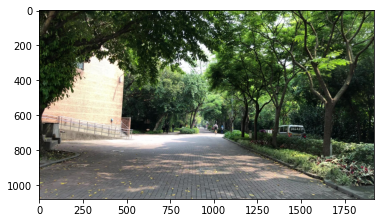

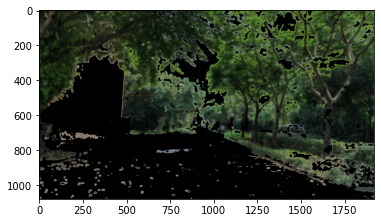

0.49368778935185187
images/TSNQ2014 0219_N52_98_S03_34.jpg


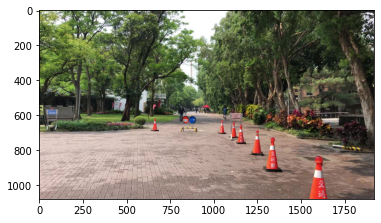

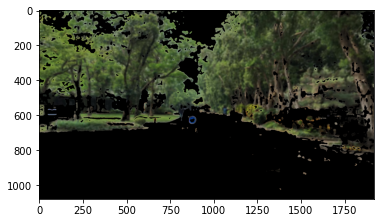

0.2679060570987654
images/TSNQ2014 1063_N33_59_S34_88.jpg


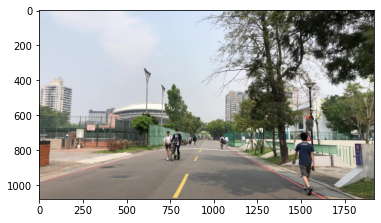

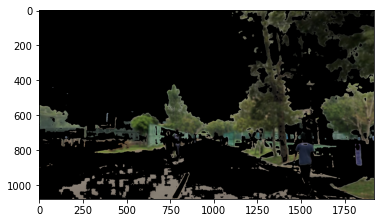

0.31775752314814815
images/TSNQ2014 1699_N28_74_S12_67.jpg


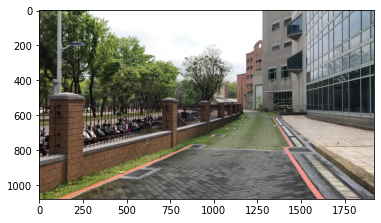

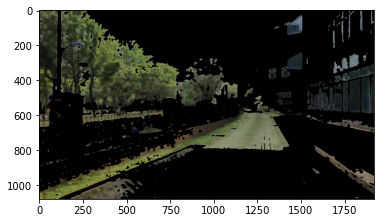

0.3740031828703704
images/TSNQ2014 1664_N10_84_S16_43.jpg


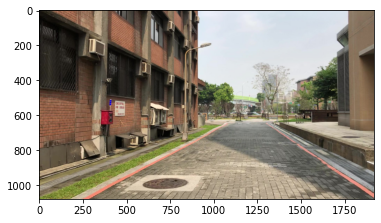

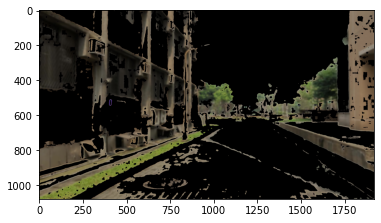

0.47923369984567904
images/TSNQ2014 0176_N52_90_S10_84.jpg


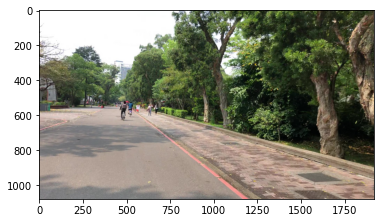

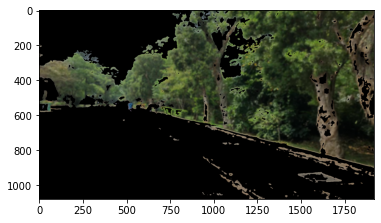

0.2604292052469136
images/TSNQ2014 1748_N34_09_S12_14.jpg


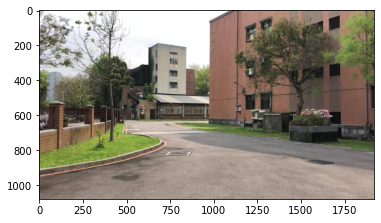

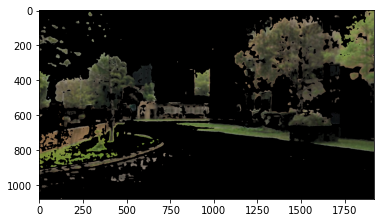

0.24215952932098767
images/TSNQ2014 1482_N24_75_S11_53.jpg


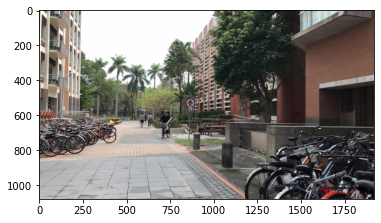

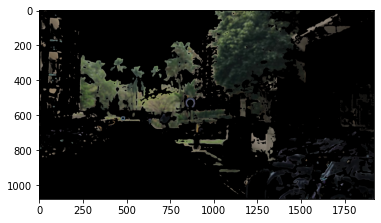

0.3720481288580247
images/TSNQ2014 0728_N38_87_S05_61.jpg


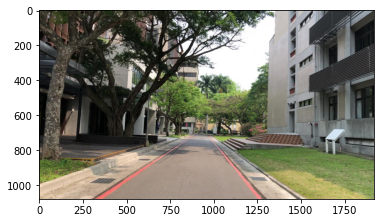

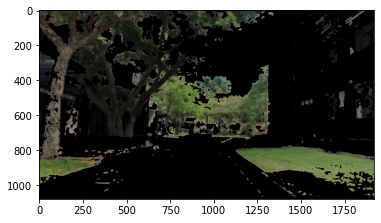

0.5529518711419753
images/TSNQ2014 0316_N60_43_S02_74.jpg


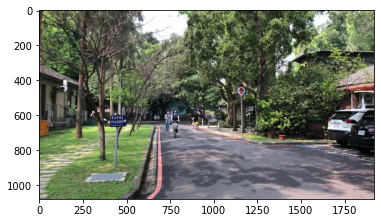

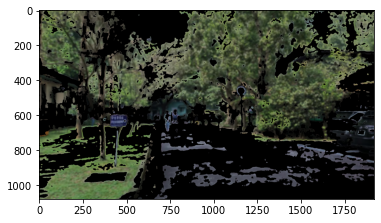

0.4476726466049383
images/TSNQ2014 1528_N53_38_S07_17.jpg


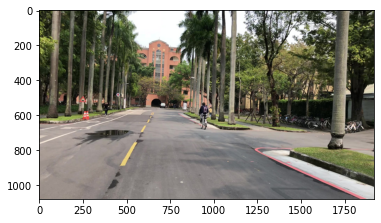

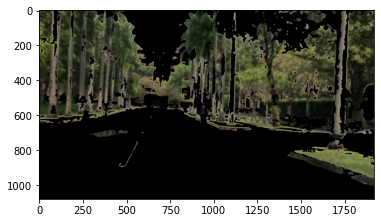

0.4228559027777778
images/TSNQ2014 1257_N51_20_S40_71.jpg


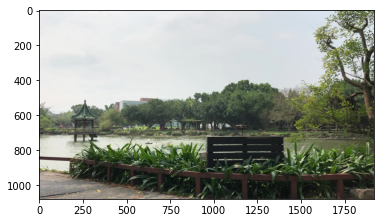

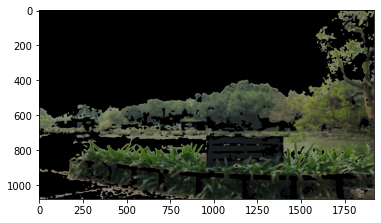

0.5244593942901234
images/TSNQ2014 1272_N79_59_S12_31.jpg


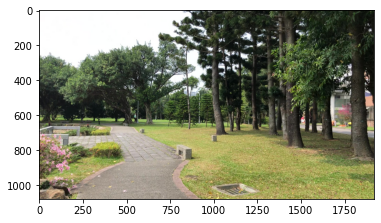

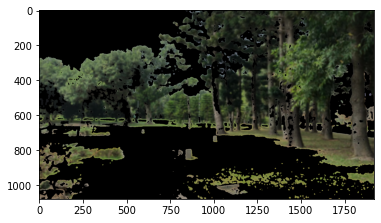

0.45287181712962965
images/TSNQ2014 1912_N66_73_S03_98.jpg


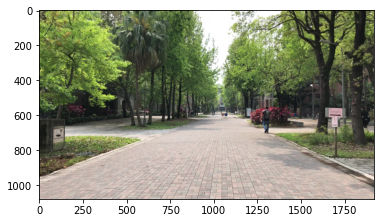

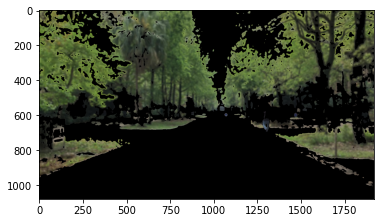

In [358]:
for f in glob.glob("images/*.jpg"):
    img = cv2.imread(f)
    img_green = get_green_mask_naive(img)
    print(f)
    plt.imshow(img[:,:,::-1])
    plt.show()
    plt.imshow(img_green[:,:,::-1])
    plt.show()